In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
dataset = pd.read_csv("/content/penguins_size.csv")

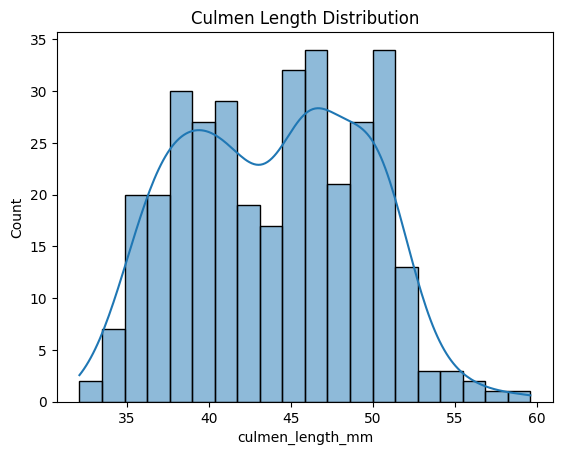

In [30]:
sns.histplot(data=dataset, x="culmen_length_mm", bins=20, kde=True)
plt.title("Culmen Length Distribution")
plt.show()

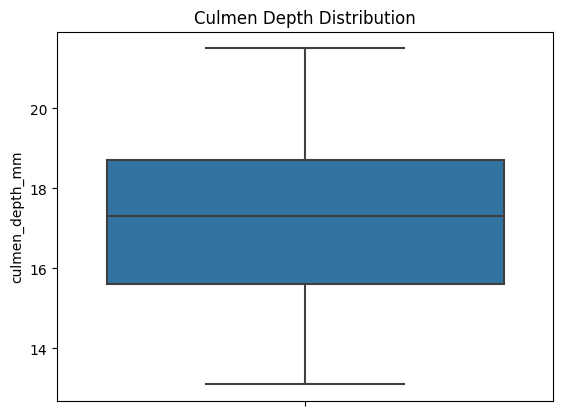

In [31]:
sns.boxplot(data=dataset, y="culmen_depth_mm")
plt.title("Culmen Depth Distribution")
plt.show()

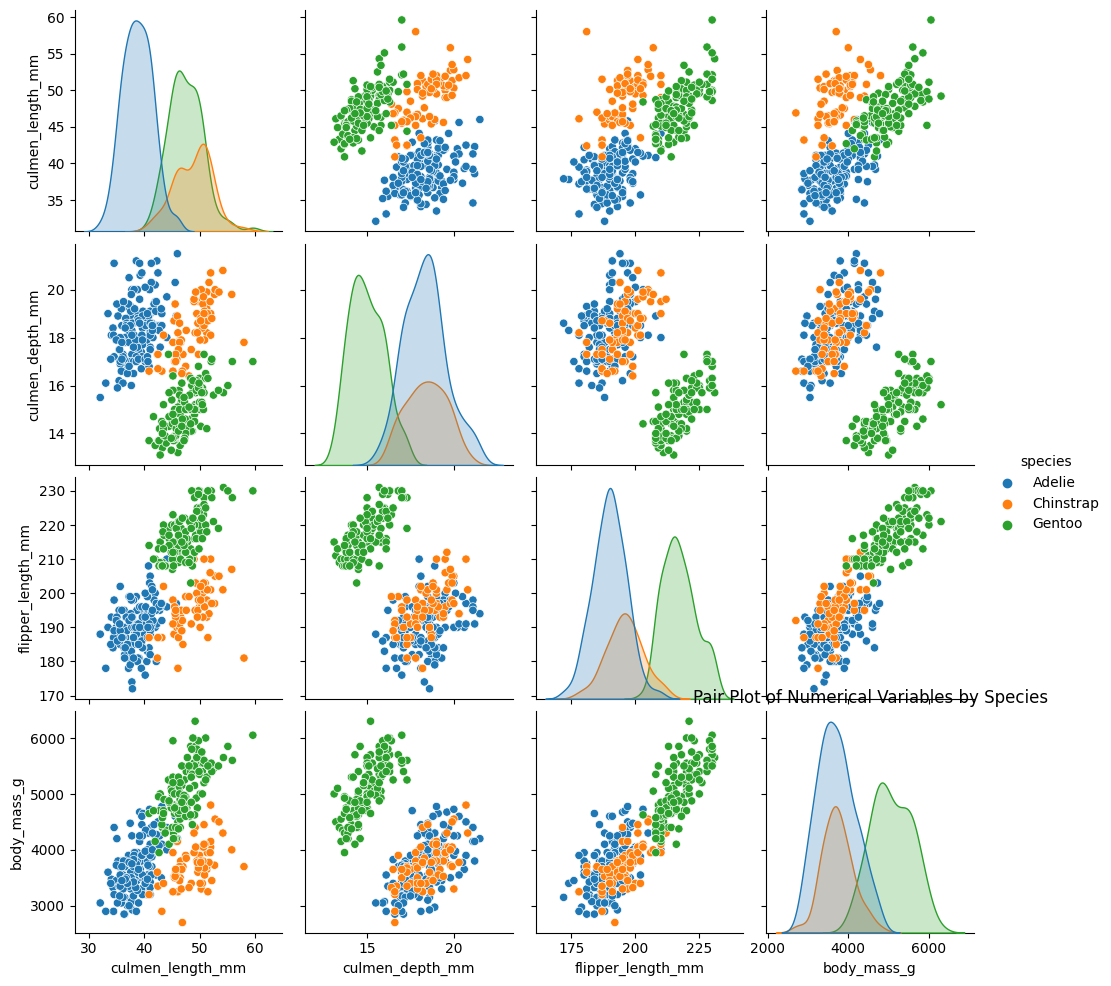

In [32]:
sns.pairplot(data=dataset, hue="species")
plt.title("Pair Plot of Numerical Variables by Species")
plt.show()

In [33]:
print(dataset.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


In [34]:
print(dataset.isnull().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


In [35]:
dataset.fillna(dataset.mean(), inplace=True)

<ipython-input-35-d9c55fd6e3e4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.fillna(dataset.mean(), inplace=True)


In [36]:
print(dataset.isnull().sum())

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64


In [37]:
correlation_matrix = dataset.corr()
print(correlation_matrix)

                   culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


<ipython-input-37-746efd4becee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


In [38]:
label_encoder = LabelEncoder()
dataset['species'] = label_encoder.fit_transform(dataset['species'])
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])

In [45]:
X = dataset.drop('species', axis=1)
y = dataset['species']

In [48]:
numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_cols = [col for col in X.columns if col not in numeric_cols]
scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(X[numeric_cols])
X_scaled = np.concatenate([X_scaled_numeric, X[categorical_cols]], axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [50]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (275, 6)
X_test shape: (69, 6)
y_train shape: (275,)
y_test shape: (69,)
